In [1]:
import os
from pathlib import Path

__file__ = os.path.realpath("__file__")
root_dir = Path(__file__).parent
data_dir = root_dir / "data" / "p4kxspotify.csv"

if data_dir.exists():
    print(data_dir)

/home/sunmoon/workspace/p4kxspotify/data/p4kxspotify.csv


In [2]:
import pandas as pd

df = pd.read_csv(data_dir)
df.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308


array([[<AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'releaseyear'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>]], dtype=object)

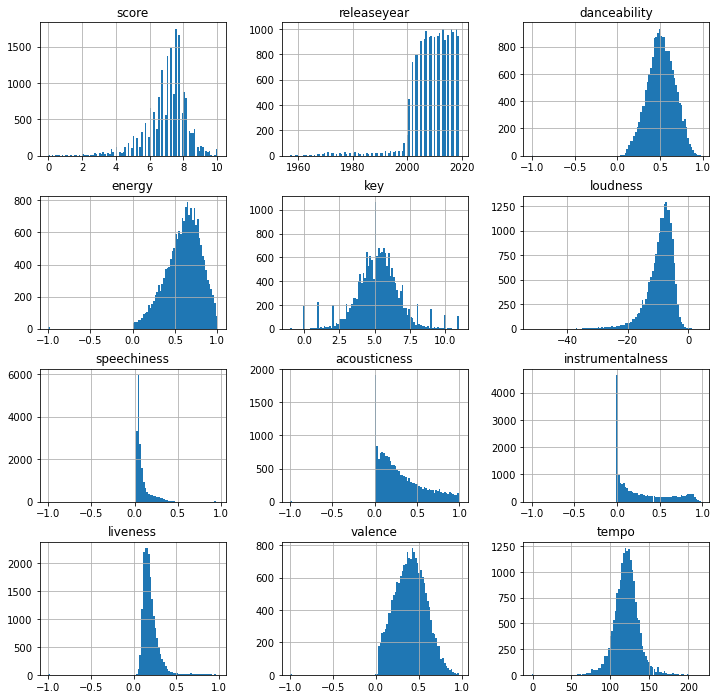

In [3]:
df.hist(bins=100, figsize=(12, 12))

In [4]:
df.groupby(by=["genre"]).mean()

,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
genre,,,,,,,,,,,,
Electronic,6.950424,2009.467133,0.548250,0.611856,5.225703,-9.893206,0.088960,0.276750,0.391956,0.188951,0.406129,121.241313
Experimental,7.370521,2009.179005,0.440247,0.549128,5.173335,-11.042842,0.088476,0.389700,0.414913,0.194798,0.321892,117.591664
Folk/Country,7.218717,2009.224185,0.489917,0.432933,5.217876,-11.328653,0.059226,0.547060,0.234428,0.170023,0.368790,117.715611
Global,7.392593,2008.080745,0.604127,0.630919,5.265143,-8.824250,0.093919,0.333800,0.223838,0.197470,0.581275,119.958435
Jazz,7.604965,2006.773381,0.473293,0.530955,5.307757,-11.514143,0.086607,0.421417,0.383124,0.204697,0.383320,113.995931
Metal,7.087139,2009.679045,0.373181,0.722048,5.294156,-8.060718,0.088977,0.154980,0.426114,0.217542,0.287738,122.347407
Pop/R&B,6.981972,2010.798600,0.573230,0.584494,5.245359,-8.657680,0.092707,0.301240,0.154229,0.186121,0.446911,118.246446
Rap,6.966363,2012.219170,0.647143,0.661167,5.254297,-7.514247,0.217749,0.215771,0.073179,0.225258,0.484119,117.511768
Rock,6.994171,2008.427127,0.484897,0.603101,5.187187,-8.926123,0.065513,0.299175,0.232743,0.196033,0.413282,121.859770


In [5]:
columns = list(df.columns)
labels = list(range(1955, 2025, 5))

df_upper = df.copy()
df_under = df.copy()

df_upper = df_upper[df_upper["score"] > df_upper["score"].mean()]
df_under = df_under[df_under["score"] <= df_under["score"].mean()]

df_upper_grouped = df_upper.groupby(pd.cut(df_upper["releaseyear"], bins=labels, right=False)).mean()
df_under_grouped = df_under.groupby(pd.cut(df_under["releaseyear"], bins=labels, right=False)).mean()

/home/sunmoon/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/axes/_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


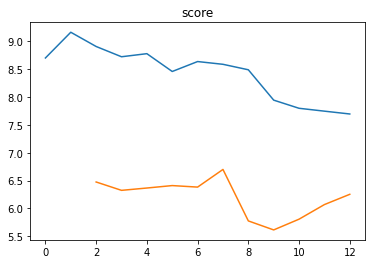

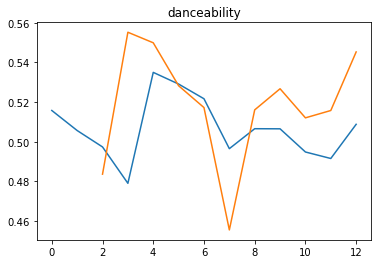

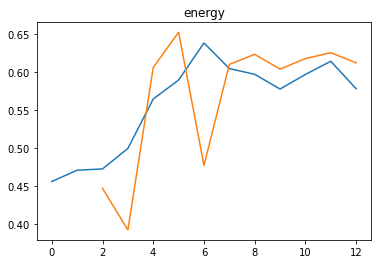

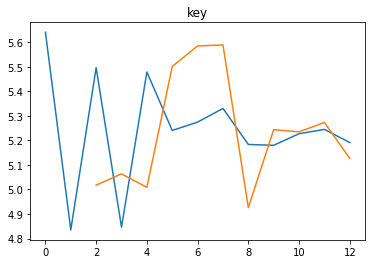

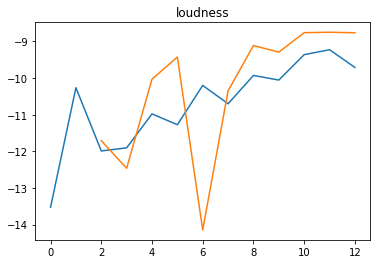

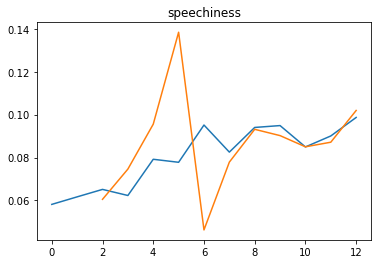

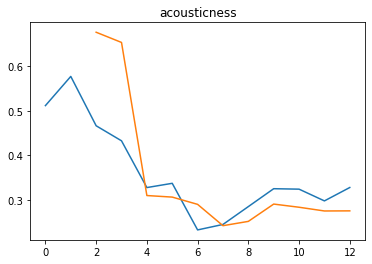

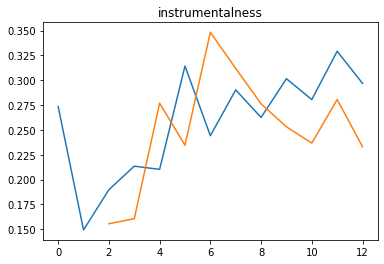

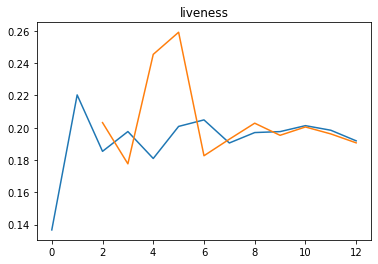

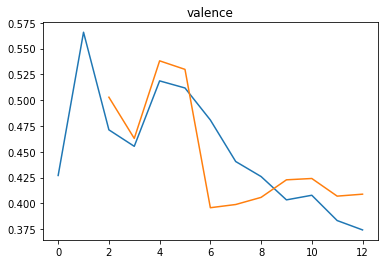

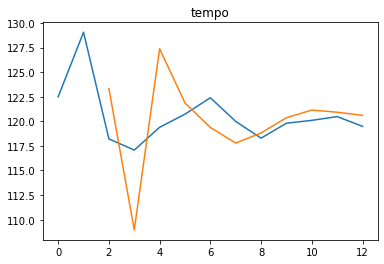

In [6]:
import matplotlib.pyplot as plt

columns = ["score", "danceability", "energy", "key", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

for column in columns:
    plt.plot(df_upper_grouped[column])
    plt.plot(df_under_grouped[column])
    plt.title(column)

    plt.show()